In [8]:
%cd ../..

/home/antoine/Gdrive/Autoencoders


### connect to your Gdrive

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# go to the parent folder of mmk/

%cd /gdrive/My\ Drive/

### Install `mmk` and its dependencies

In [ ]:
!git clone https://github.com/antoinedaurat/mmk.git
!pip install -r mmk/requirements.txt

### Imports

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
plt.rcParams['figure.figsize'] = (20, 6)
import torch
import numpy as np
import os

# class defining the class of FreqNet models and the dictionary to subclass it
from mmk.models.freqnet import FreqNet, layer_funcs

# generate function 
from mmk.modules.generate import generate

# data utils
from mmk.data import make_root_db, Database

# debug, interact
from mmk.utils import show, audio


### Data

In [10]:
# where you have audio files 
my_music_folder = "nessun_dorma/data/arie/"

# the file with your data :
my_db = ".arie_mmk.h5"

if not os.path.exists(my_db):
    make_root_db(my_db, my_music_folder)

db = Database(my_db)

db.metadata

/home/antoine/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/antoine/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->MultiIndex([('directory',      ''),
            (     'name',      ''),
            (      'fft', 'dtype'),
            (      'fft', 'shape'),
            (      'fft',  'size')],
           )]

  encoding=encoding,
/home/antoine/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ra

/home/antoine/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->MultiIndex([('directory',      ''),
            (     'name',      ''),
            (      'fft', 'dtype'),
            (      'fft', 'shape'),
            (      'fft',  'size')],
           )]

  encoding=encoding,
/home/antoine/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/antoine/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as 

/home/antoine/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/antoine/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->MultiIndex([('directory',      ''),
            (     'name',      ''),
            (      'fft', 'dtype'),
            (      'fft', 'shape'),
            (      'fft',  'size')],
           )]

  encoding=encoding,
/home/antoine/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ra

,start,stop,duration,name
0,0,16111,16111,nessun_dorma/data/arie/Luciano Pavarotti Una ...
1,16111,28565,12454,nessun_dorma/data/arie/Purcell - Dido Aeneas ...
2,28565,46757,18192,nessun_dorma/data/arie/42 La Fatal Pietra Sovr...
3,46757,55167,8410,nessun_dorma/data/arie/39 Nessun Dorma
4,55167,65052,9885,"nessun_dorma/data/arie/27 Ah Si, Ben Mio...Di ..."
5,65052,72372,7320,nessun_dorma/data/arie/39 Ohime! Morir Mi Sento!
6,72372,84061,11689,"nessun_dorma/data/arie/Anna Bolena, Act 2 Al d..."
7,84061,99905,15844,"nessun_dorma/data/arie/La Traviata - Atto III,..."
8,99905,116349,16444,nessun_dorma/data/arie/Maria Callas Verdi - La...
9,116349,122853,6504,nessun_dorma/data/arie/Elina Garanca - Deh tu ...


# Model's Definition and Training

## FreqNet's Parameters :

### Layer Functions

`FreqNet` is, similar to Wavenet, a model with stacked dilated convolution layer. The layer function of FreqNet allows you to specify different options for the implemententation of those stacked dilated convolution layers that result in models with different properties.

Options are :
- `strict` can be `True` or `False`. It specifies whether each layer is to be defined as an autoregressive function or not. Originally, Wavenet considers the whole network to be such a function. Accordingly, for an input of the length of wavenet's receptive-field, wavenet outputs a single (future) time-step. Setting `strict` to `True`, makes each layer outputs a (future) time-step, which results in an output of `#of-layers` time-steps for an input with length equal to the receptive-field. 
- `accum_outputs` adds residual to the layer's definition. Possible values are `[-1, 0, 1]` for residuals aligned to the left, no residuals, and residuals aligned to the right respectively.
- `concat_outputs` also takes `[-1, 0, 1]` as possible values for left-, None and right-concatenation respectively. Since convolution layers outputs fewer time-steps then they recieve, this option concatenates some of the input (left or right) to make the output of the layer have the same length as the input.
- `pad_input` also takes `[-1, 0, 1]` as possible values for left-, None and right-padding of the input.

`layer_funcs` is a `dict` holding pre-defined layer functions. Just take a look at this object to see some possible combinations of these options.


### Other Parameters

- `database` must be the `Database` object holding the data you want to use for training.
- `train_set` must be a `pandas.DataFrame` specifying some subset of the data.
- `gate_c`, `residuals_c` and `skips_c` are the number of channels to use for each of this convolutions
- `conv_kwargs` is a `dict` of parameters for the `torch.nn.Conv1d` objects.
- `lf` is the layer_function. It should be a `partial` packed in a tuple (otherwise it mysteriously disappear from the hyperparameters...)
- `layers` is a tuple of integers. Each integers `k` defines a block of `k` layers that will have `2**k` time-steps in its receptive-field.
- `learn_padding` lets you make the input padding learnable whenever you use `pad-input` in the layer-function.
- `lr` is the max learning rate. Values between 1e-3 and 1e-4 work in most cases.
- `batch_size` and `batch_length` lets you specify `N` and `S` for batches of shape `(N x S x D)` aka (number of sequences, number of steps per sequence, time-step dimensionality)
- `root_dir`, `name` and `version` specify where to store the model files. The path to all the files will be `root_dir/name/version`. If you don't specify a `version` and `overwrite` is `False` a new folder is added in `root_dir/name`
- `era_duration` is the frequency at which you want to make training checkpoints. `era_duration=50` means you'll have one checkpoint every 50 epochs. 

In [11]:
fnet = FreqNet(
    # data :
    database=db,
    train_set=db.metadata.iloc[[0, ]],
    # model architecture
    gate_c=512,
    residuals_c=512,
    skips_c=512,
    conv_kwargs=dict(groups=1),
    lf=layer_funcs["residuals_left"],
    layers=(int(np.log2(16)),),
    learn_padding=False,
    # training
    lr=5e-4,
    batch_size=64,
    batch_length=64,
    max_epochs=100,
    # file-system
    overwrite=False,
    name="mmk_test_model",
    root_dir="mmk_test_model/",
    era_duration=50,
)

trainer = fnet.get_trainer()
trainer.fit(fnet)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]

  | Name   | Type             | Params
--------------------------------------------
0 | inpt   | GatedLinearInput | 1 M   
1 | blocks | ModuleList       | 6 M   
2 | outpt  | AbsLinearOutput  | 525 K 
/home/antoine/anaconda3/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


initialized directory: mmk_test_model/mmk_test_model/v0/


Epoch: 0 - Loss: 71.7579
Epoch: 1 - Loss: 57.7702
Epoch: 2 - Loss: 50.5838
Epoch: 3 - Loss: 45.3719

Training finished after 0 days 0 hours 2 mins 23 seconds


/home/antoine/anaconda3/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


1

## Generate from trained model

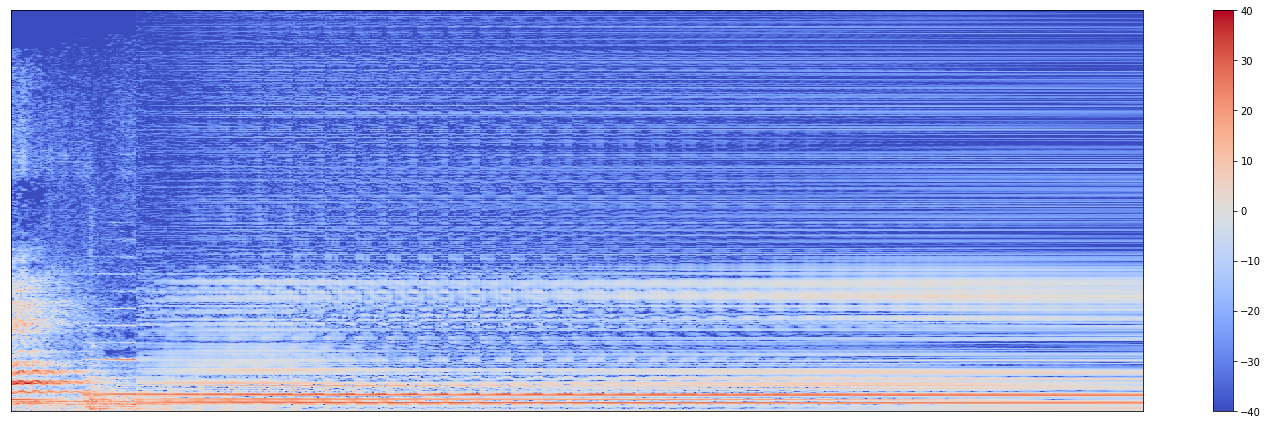

In [13]:
root_dir="mmk_test_model/"
name="mmk_test_model"
version = str(0)
epoch = None

input_length = 64
n_steps = 512
# pick a random input slice from the trainset
piece = fnet.train_set.sample(1)
input_start = np.random.randint(piece.start.min(), piece.stop.max(), 1)[0]
inpt = fnet.database.fft[input_start:input_start+input_length]

# load the checkpoint
fnet = FreqNet.load(FreqNet, root_dir + name + "/v" + version + "/", epoch)
if torch.cuda.is_available():
    fnet.to("cuda")

generated = generate(fnet, inpt, n_steps, *fnet.generation_slices())

audio(generated.T)
show(generated.T)
